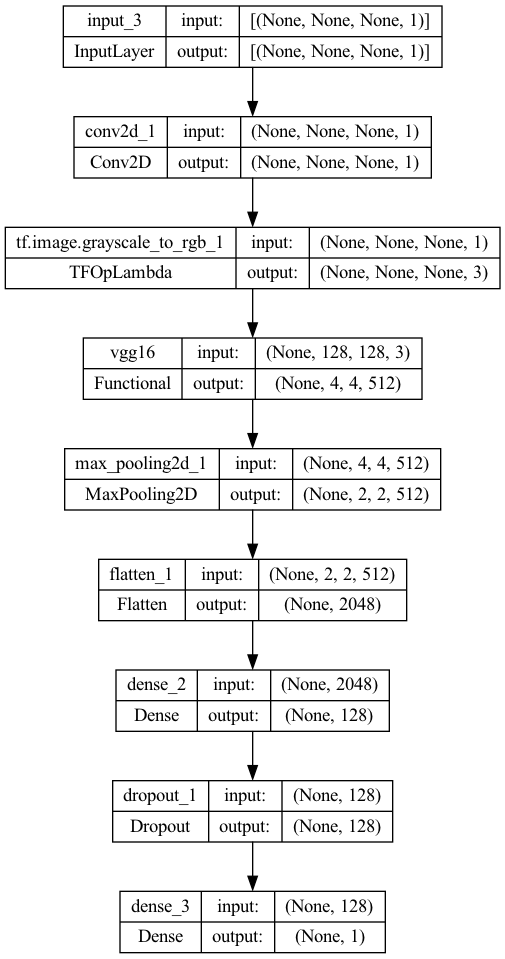

In [2]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG16
import tensorflow as tf

# Define the input shape
inputs = Input(shape=(None, None, 1))

# Define the layers of the model
x = Conv2D(1, (1, 1), padding='same')(inputs)
x = tf.image.grayscale_to_rgb(x)
pretrained_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
x = pretrained_model(x)
x = MaxPooling2D()(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(1, activation='sigmoid')(x)

# Create the model
model = Model(inputs, outputs)

# Plot the model architecture
plot_model(model, to_file='model_diagram.png', show_shapes=True)